In [22]:
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [202]:
def auto_circuit(inp):
    qc = QuantumCircuit(2)
    #RX and RY on the 0th qubits. This is hadamard equivalent for 1st qubit. 
    #The combination of RX and RY results in our desired bell state. This gives us the probablity of 50/50 for |01> and |10
    qc.ry(inp,0)
    qc.rx(inp,0)
    #RY whenever the qubit is 1 
    qc.rx(inp,1)
    #CNOT Gate after applying the hadamard equivalent 
    qc.cx(0, 1)
    return qc

In [193]:
def sim_results(circuit, num_of_shots):
    #using the qasm noisy simulator for a variety of shots 
    simulator = Aer.get_backend('qasm_simulator')
    backend = Aer.get_backend('statevector_simulator')
    sim_result = execute(qc, backend, shots=1000).result().get_counts()
    return sim_result

In [194]:
total_shots=[1,10,100,1000]

In [195]:
#Getting the probabilities of missing the shots
def miss_rate(sim_r,shots):
    missRate_01=sim_r.get('01',0)/shots
    missRate_10=sim_r.get('10',0)/shots
    sum_miss=(missRate_01-0.5)**2+(missRate_10-0.5)**2
    return sum_miss

In [107]:
#Optimizing to get maximum Hit rate 

In [196]:
def auto_miss_rate(cir_val, i):
    qc = auto_circuit(cir_val)
    probs = sim_results(qc, i)
    return get_miss_rate(probs, i)

In [197]:
opt = minimize(input_to_loss, np.random.rand()*np.pi, method='SLSQP', args=(total_shots[3],))
opt

     fun: 0.24926271640688827
     jac: array([0.])
 message: 'Optimization terminated successfully'
    nfev: 2
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([2.515395])

In [198]:
#Circuit that uses optimized values for RX and RY gates 
circuit=auto_circuit(opt.x)

In [199]:
probs=sim_results(circuit,total_shots[3])

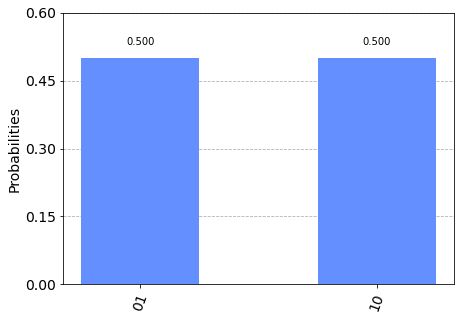

In [201]:
plot_histogram(probs)